## Deana Moghaddas
### last updated: 02/07/2021

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
us_vax = pd.read_csv("us_state_vaccinations_0207.csv")
loc_vax = pd.read_csv("locations_0207.csv")
gdp_countries = pd.read_excel("gdp_countries.xls")

In [3]:
pd.set_option('display.max_rows', 1000)
us_vax

,date,location,total_distributed,total_vaccinations,distributed_per_hundred,total_vaccinations_per_hundred,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,377025.0,78134.0,7.69,1.59,70861.0,1.44,7270.0,0.15,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,378975.0,84040.0,7.73,1.71,74792.0,1.52,9245.0,0.19,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,435350.0,92300.0,8.88,1.88,80480.0,1.64,NaN,NaN,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,444650.0,100567.0,9.07,2.05,86956.0,1.77,13488.0,0.27,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,2021-02-03,Wyoming,97750.0,60775.0,16.89,10.50,49361.0,8.53,10495.0,1.81,1757.0,2479.0,4283.0,0.622
1751,2021-02-04,Wyoming,97750.0,60775.0,16.89,10.50,49361.0,8.53,10495.0,1.81,0.0,2479.0,4283.0,0.622
1752,2021-02-05,Wyoming,101650.0,67417.0,17.56,11.65,53630.0,9.27,12852.0,2.22,6642.0,2607.0,4504.0,0.663
1753,2021-02-06,Wyoming,101650.0,71858.0,17.56,12.42,56076.0,9.69,14835.0,2.56,4441.0,3242.0,5602.0,0.707


In [4]:
vaxbystate = us_vax.pivot_table(values = "total_vaccinations", 
                                index = "location", aggfunc = np.mean)


In [5]:
vaxbystate.head()

,total_vaccinations
location,
Alabama,265787.916667
Alaska,96027.708333
American Samoa,8059.666667
Arizona,456344.833333
Arkansas,237503.250000


In [6]:
demvsgopstates = us_vax[us_vax["location"].isin(["California", "New York State", "Texas", "Florida"])]

Text(0.5, 0.98, 'Daily State Vaccinations Per Million People')

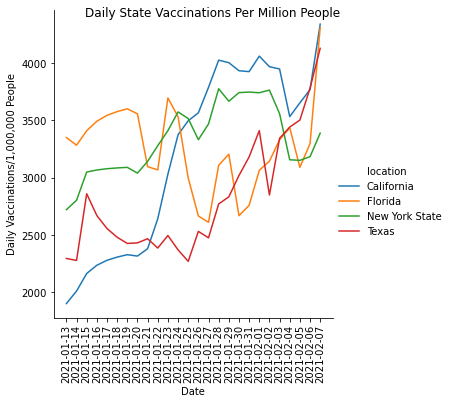

In [7]:
g = sns.relplot(x = "date", y = "daily_vaccinations_per_million", data = demvsgopstates, kind = "line", hue = "location")
plt.xticks(rotation = 90)
g.set(xlabel= "Date", ylabel= "Daily Vaccinations/1,000,000 People")
g.fig.suptitle("Daily State Vaccinations Per Million People")

Text(0.5, 0.98, 'Total Vaccinations Per Hundred People')

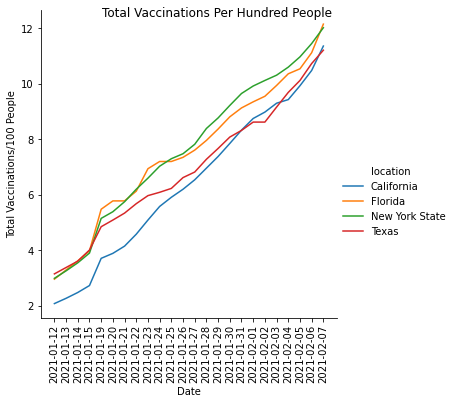

In [8]:
g = sns.relplot(x = "date", y = "total_vaccinations_per_hundred", data = demvsgopstates, kind = "line", hue = "location")
plt.xticks(rotation = 90)
g.set(xlabel= "Date", ylabel= "Total Vaccinations/100 People")
g.fig.suptitle("Total Vaccinations Per Hundred People")

Text(0.5, 0.98, 'Total Fully Vaccinated Per Hundred People')

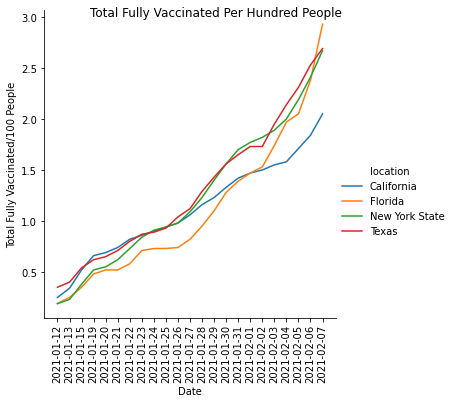

In [9]:
g = sns.relplot(x = "date", y = "people_fully_vaccinated_per_hundred", data = demvsgopstates, kind = "line", hue = "location")
plt.xticks(rotation = 90)
g.set(xlabel= "Date", ylabel= "Total Fully Vaccinated/100 People")
g.fig.suptitle("Total Fully Vaccinated Per Hundred People")

In [10]:
loc_vax.head() #Look at GDP in comparison to what vaccine they get

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Algeria,DZA,Sputnik V,2021-01-30,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Andorra,AND,Pfizer/BioNTech,2021-02-01,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
2,Argentina,ARG,Sputnik V,2021-02-06,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Austria,AUT,Pfizer/BioNTech,2021-02-06,Ministry of Health,https://www.data.gv.at/katalog/dataset/589132b...
4,Bahrain,BHR,"Pfizer/BioNTech, Sinopharm",2021-02-06,Ministry of Health,https://twitter.com/MOH_Bahrain/status/1358158...


In [11]:
loc_vax["vaccines"] = loc_vax["vaccines"].str.split(",")

In [12]:
vax_companies = {}

for vaxlist in loc_vax["vaccines"]:
    for vax in vaxlist:
        vax_companies[vax] = 0
        
for vaxlist in loc_vax["vaccines"]:
    for vax in vaxlist:
        vax_companies[vax] += 1
        
print(vax_companies)

{'Sputnik V': 4, 'Pfizer/BioNTech': 41, ' Sinopharm': 5, 'Oxford/AstraZeneca': 14, 'Moderna': 16, ' Pfizer/BioNTech': 21, ' Sinovac': 4, 'Sinopharm': 2, 'Covaxin': 1, ' Oxford/AstraZeneca': 1, 'Sinovac': 2, ' Sputnik V': 1}


Text(0.5, 1.0, 'Number of Different Vaccines Distributed')

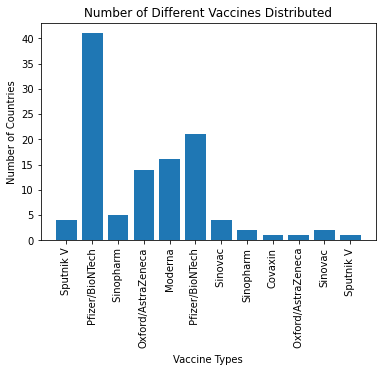

In [13]:
fig, ax = plt.subplots()

ax.bar(*zip(*vax_companies.items()))
plt.xticks(rotation='vertical')
ax.set_xlabel("Vaccine Types") 
ax.set_ylabel("Number of Countries")
ax.set_title("Number of Different Vaccines Distributed") 

In [14]:
loc_vax["vax count"] = 0
loc_vax["Pfizer/Moderna?"] = 0

for v in range(len(loc_vax['vaccines'])):
    loc_vax.loc[v, "vax count"] = len(loc_vax.loc[v, "vaccines"])

for v in range(len(loc_vax["vaccines"])):
    for i in loc_vax.loc[v, "vaccines"]:
        if (i == "Pfizer/BioNTech" or i == "Moderna"):
            loc_vax.loc[v, "Pfizer/Moderna?"] += 1
loc_vax.head()

,location,iso_code,vaccines,last_observation_date,source_name,source_website,vax count,Pfizer/Moderna?
0,Algeria,DZA,[Sputnik V],2021-01-30,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...,1,0
1,Andorra,AND,[Pfizer/BioNTech],2021-02-01,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...,1,1
2,Argentina,ARG,[Sputnik V],2021-02-06,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...,1,0
3,Austria,AUT,[Pfizer/BioNTech],2021-02-06,Ministry of Health,https://www.data.gv.at/katalog/dataset/589132b...,1,1
4,Bahrain,BHR,"[Pfizer/BioNTech, Sinopharm]",2021-02-06,Ministry of Health,https://twitter.com/MOH_Bahrain/status/1358158...,2,1


In [15]:
#gdp_countries = gdp_countries[["Data Source", "World Development Indicators", "Unnamed: 62", "Unnamed: 63"]]
gdp_countries.rename({"Data Source":"Country Name", "World Development Indicators":"Country Code", "Unnamed: 62":"2019 GDP", "Unnamed: 63":"2020 GDP"}, axis = 1, inplace = True)
gdp_countries.drop([0, 1, 2, 3], inplace = True)

In [16]:
gdp_countries.head()

,Country Name,Country Code,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,2019 GDP,2020 GDP,Unnamed: 64
4,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN,NaN
5,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,NaN
6,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.881570e+10,NaN
7,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.289077e+10,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527918e+10,NaN
8,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09,NaN


In [17]:
vax_by_gdp = pd.merge(loc_vax, gdp_countries, left_on = "iso_code", right_on = "Country Code")

In [18]:
vax_by_gdp = vax_by_gdp[["location", "iso_code", "vaccines", "Pfizer/Moderna?", "vax count", "2020 GDP"]]

In [24]:
vax_by_gdp.head() #make column with number of pfizer doses

,location,iso_code,vaccines,Pfizer/Moderna?,vax count,2020 GDP
0,Algeria,DZA,[Sputnik V],0,1,1.710913e+11
1,Andorra,AND,[Pfizer/BioNTech],1,1,3.154058e+09
2,Argentina,ARG,[Sputnik V],0,1,4.454452e+11
3,Austria,AUT,[Pfizer/BioNTech],1,1,4.450754e+11
4,Bahrain,BHR,"[Pfizer/BioNTech, Sinopharm]",1,2,3.857407e+10


Text(0.5, 1.05, 'Number of Vaccines Allocated to Countries According to GDP')

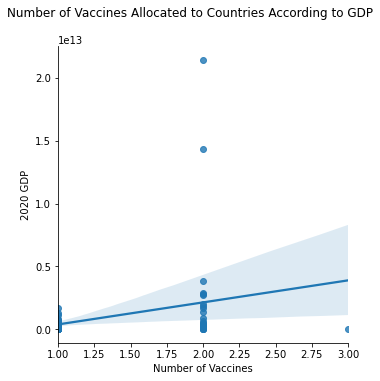

In [20]:
d = sns.lmplot("vax count", "2020 GDP", data = vax_by_gdp)
d.set(xlabel= "Number of Vaccines", ylabel= "2020 GDP")
d.fig.suptitle("Number of Vaccines Allocated to Countries According to GDP", y = 1.05)